In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [3]:
## 전체 소스코드
## http://bit.ly/hg-03-1

In [4]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
np.shape(perch_length)

(56,)

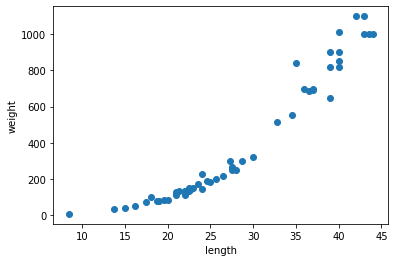

In [6]:
# 데이터에서 인사이트를 얻기 위해 그래프를 그려 본다.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 42)

print(np.shape(train_input))
print(np.shape(test_input))

(42,)
(14,)


In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)  # 괄호 안에 앞에 14를 써야하지만 -1을 쓰면 알아서 계산해줌)

print(np.shape(train_input))

(42, 1)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [12]:
# 데이터를 핏팅중
knr.fit(train_input, train_target) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
# R-Squared 값이 나온다.
# R^2
knr.score(test_input, test_target)

0.9928094061010639

In [14]:
from sklearn.metrics import mean_absolute_error

In [16]:
test_prediction = knr.predict(test_input)

print(test_prediction)
print(test_target)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [17]:
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_target, test_prediction)

print(mse)

721.7385714285714


In [20]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1, 21) :
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    r2_train.append(knr.score(train_input, train_target))
    r2_test.append(knr.score(test_input, test_target))
    neighbor_n.append(n)
    
print(r2_train)
print(r2_test)
print(neighbor_n)

[0.9852830341215901, 0.9828437127041165, 0.9804899950518966, 0.978211389719245, 0.9698823289099255, 0.9757140960298664, 0.9761170732051528, 0.9697604397763201, 0.9693310367551284, 0.9616456902604301, 0.9515761381539326, 0.9467103631225754, 0.9413423450130075, 0.9429470576557883, 0.9302011183607761, 0.9180230473767479, 0.9087778943199959, 0.8957457327394256, 0.8782082893573573, 0.8612516394391275]
[0.991309195814175, 0.9725010241788556, 0.974645996398761, 0.9840231023848637, 0.9928094061010639, 0.9855001139899047, 0.9781383949643515, 0.9780541148735825, 0.9692647749722698, 0.9737908255822255, 0.970279643030474, 0.967703620310643, 0.9639044643206888, 0.9615046463124021, 0.9554827691127019, 0.9485555263458804, 0.9314058693169346, 0.9177544733070507, 0.9009936976237058, 0.8785331565429304]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


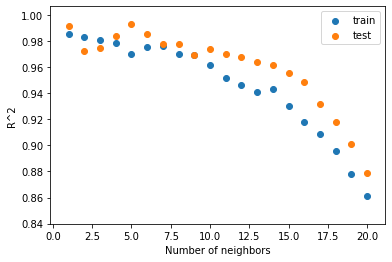

In [21]:
plt.scatter(neighbor_n, r2_train, label="train")
plt.scatter(neighbor_n, r2_test, label="test")

plt.xlabel("Number of neighbors")
plt.ylabel("R^2")
plt.legend()

plt.show()